# Bisecting KMeans

Implemented the bisecting k-means algorithm with interfaces for different kinds of datapoints and calculation of centroids. All of that can be defines individually for each dataset.

In this example we use a simple implementation with 2D vectors.

In [1]:
import random

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram

from src.clustering import BisectingKMeans
from src.clustering.centroid2d import Centroid2D, Datapoint2D

In [2]:
mpl.rcParams['figure.dpi'] = 300

## Sample Dataset

In [3]:
dataset = [
    Datapoint2D(0, 3),
    Datapoint2D(1, 2),
    Datapoint2D(2, 1),
    Datapoint2D(4, 1),
    Datapoint2D(2, 4),
    Datapoint2D(3, 5),
    Datapoint2D(4, 4),
    Datapoint2D(5, 3),
    Datapoint2D(5, 4),
    Datapoint2D(5, 5),
]

<AxesSubplot:title={'center':'Sample Dataset'}, xlabel='x', ylabel='y'>

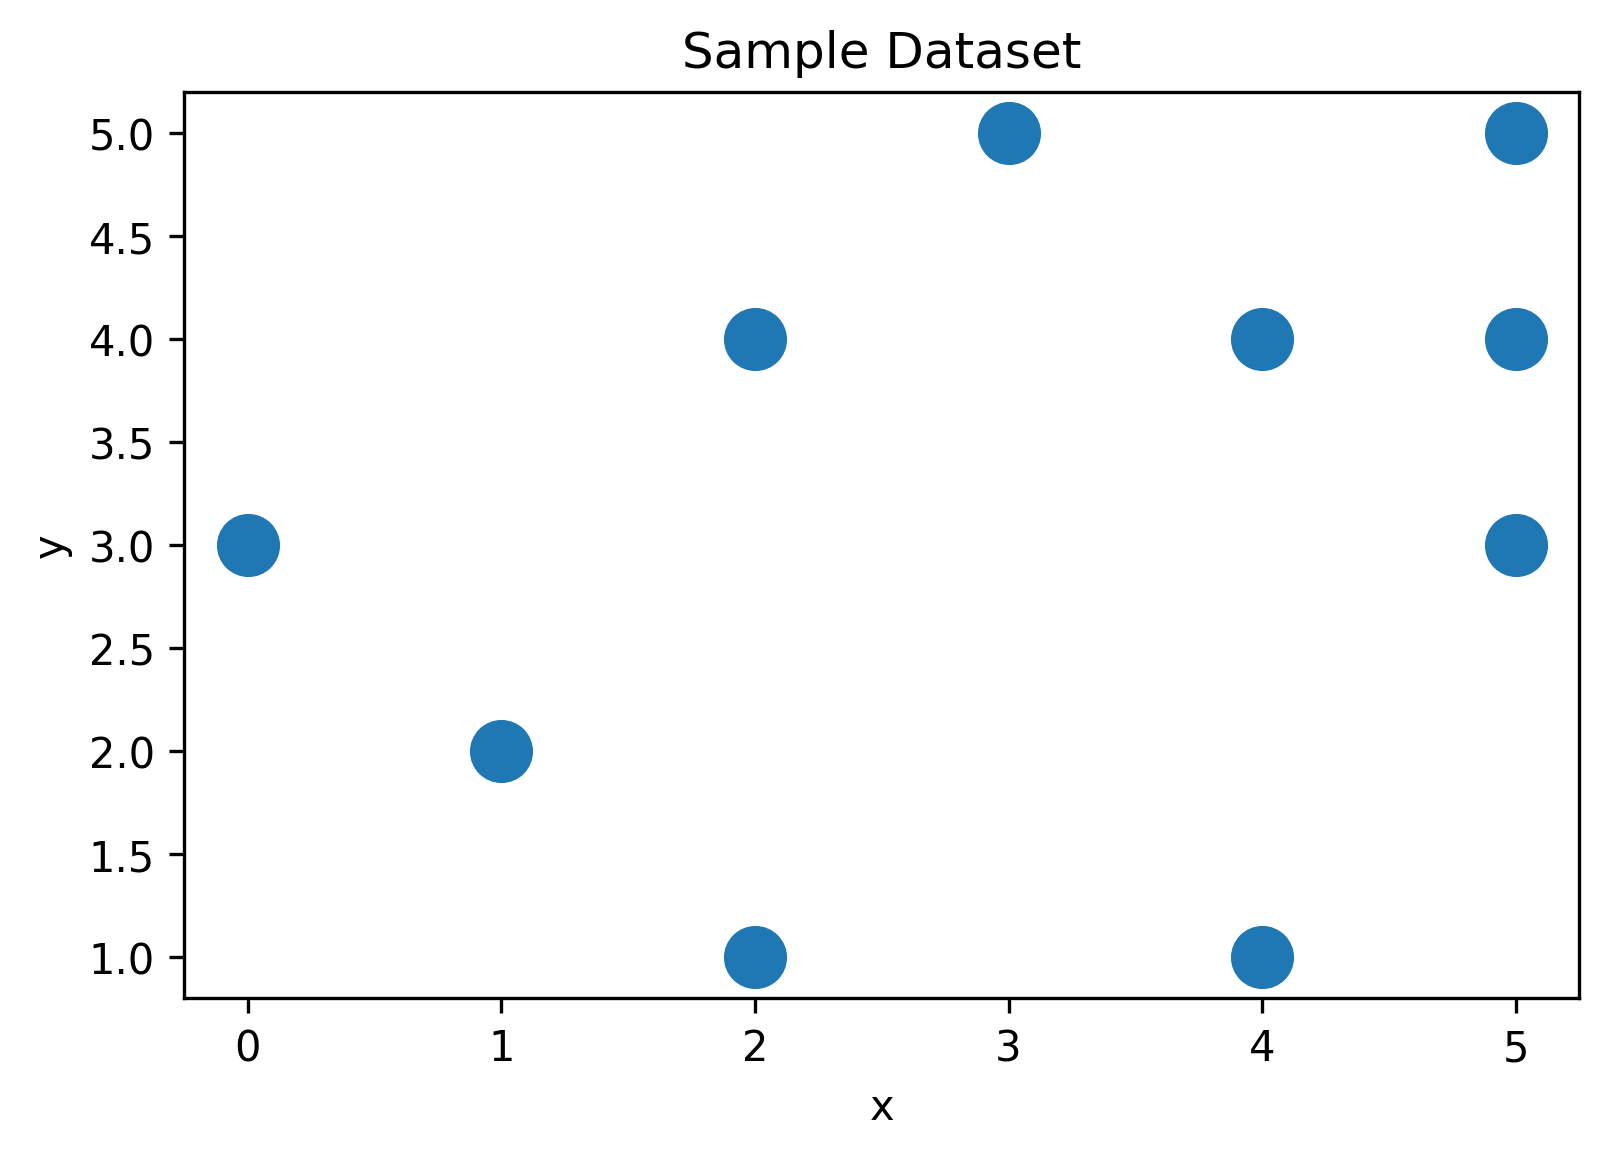

In [4]:
pd.DataFrame(dataset).plot.scatter(title="Sample Dataset", x="x", y="y", s=200)

## Clustering with Bisecting-K-Means

The clustering starts immediately when the `BisectingKMeans` class is invoked. The results are stored in the class instance, so afterwards there is no more clustering going on. It's all done by this point.

In [6]:
random.seed(0) # for reproducible results
bi_kmeans = BisectingKMeans(dataset, Centroid2D, kmeans_n_init=100)

### Result Map

The result is a map for each datapoint to the different clusters it belongs to.

In [7]:
bi_kmeans.labels

[{0},
 {0, 8},
 {0, 6},
 {0, 2},
 {0, 3},
 {0, 1, 4},
 {0, 1, 7},
 {0, 1, 5},
 {0, 1},
 {0, 1, 9}]

### Result for a Specific Number of Clusters

The mapping for a specific number of clusters can also be obtained like so:

In [8]:
bi_kmeans.labels_flat(4)

[0, 0, 0, 2, 3, 1, 1, 1, 1, 1]

## Visualizations

### Error During Clustering

<AxesSubplot:title={'center':'Error per number of clusters'}>

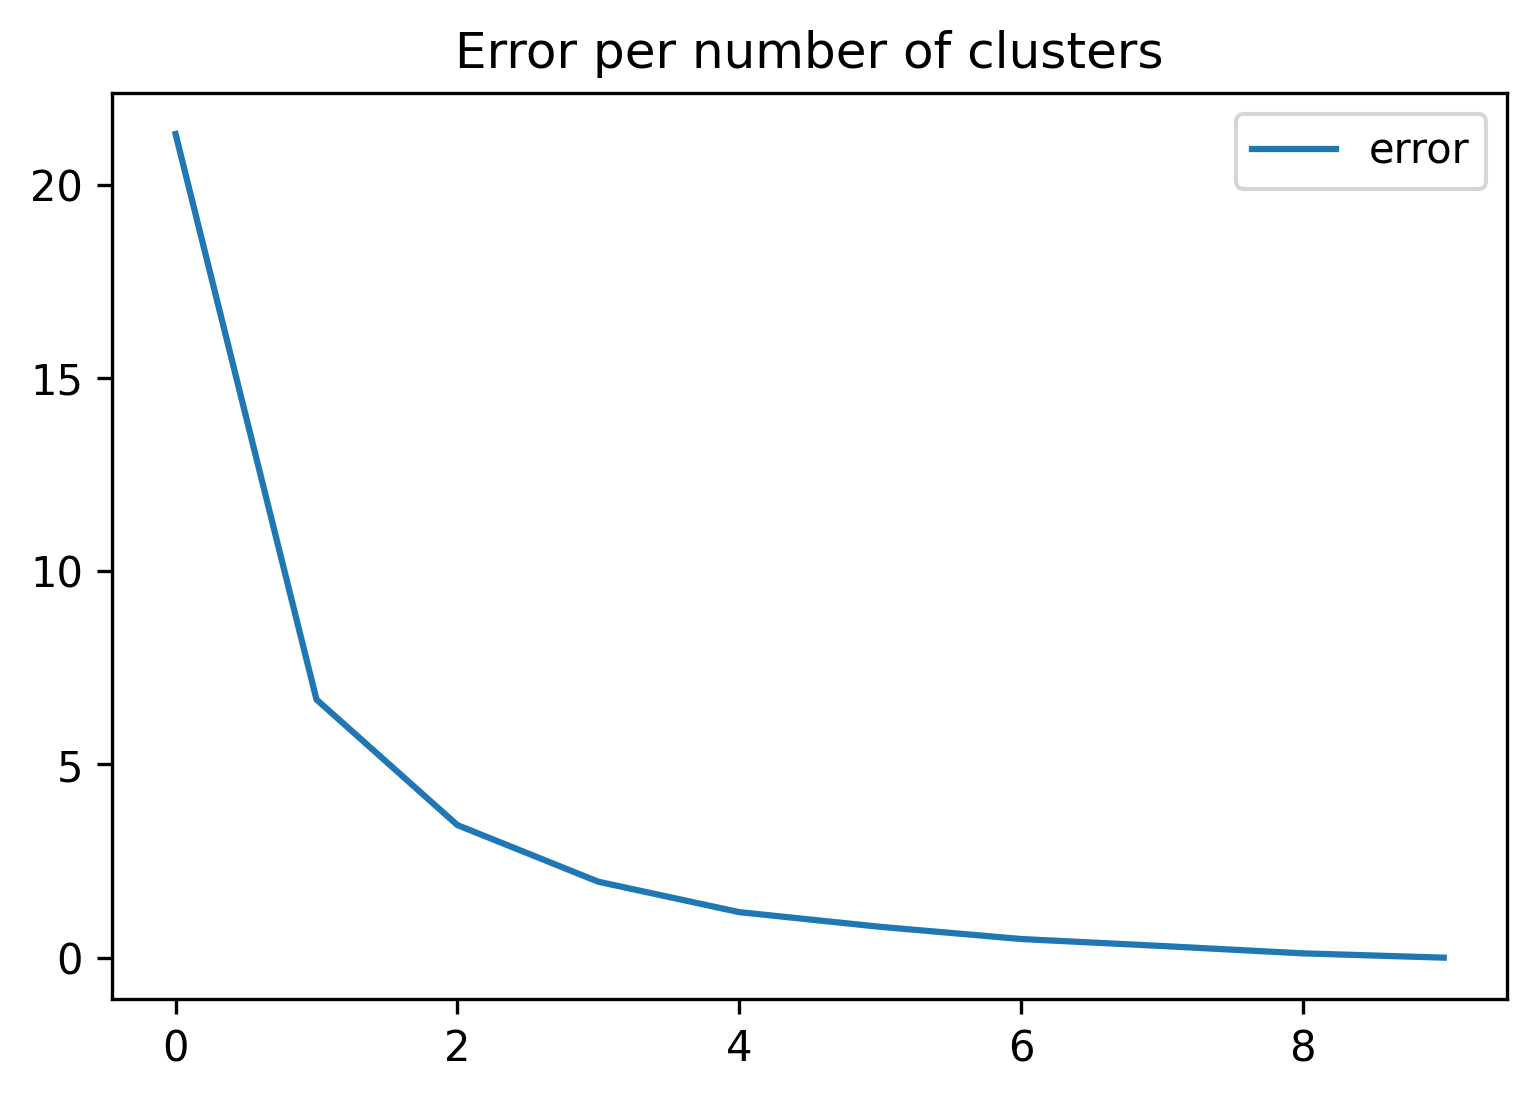

In [9]:
df = pd.DataFrame(bi_kmeans.errors, columns=["error"])
df.plot.line(title="Error per number of clusters")

### Dendrogram

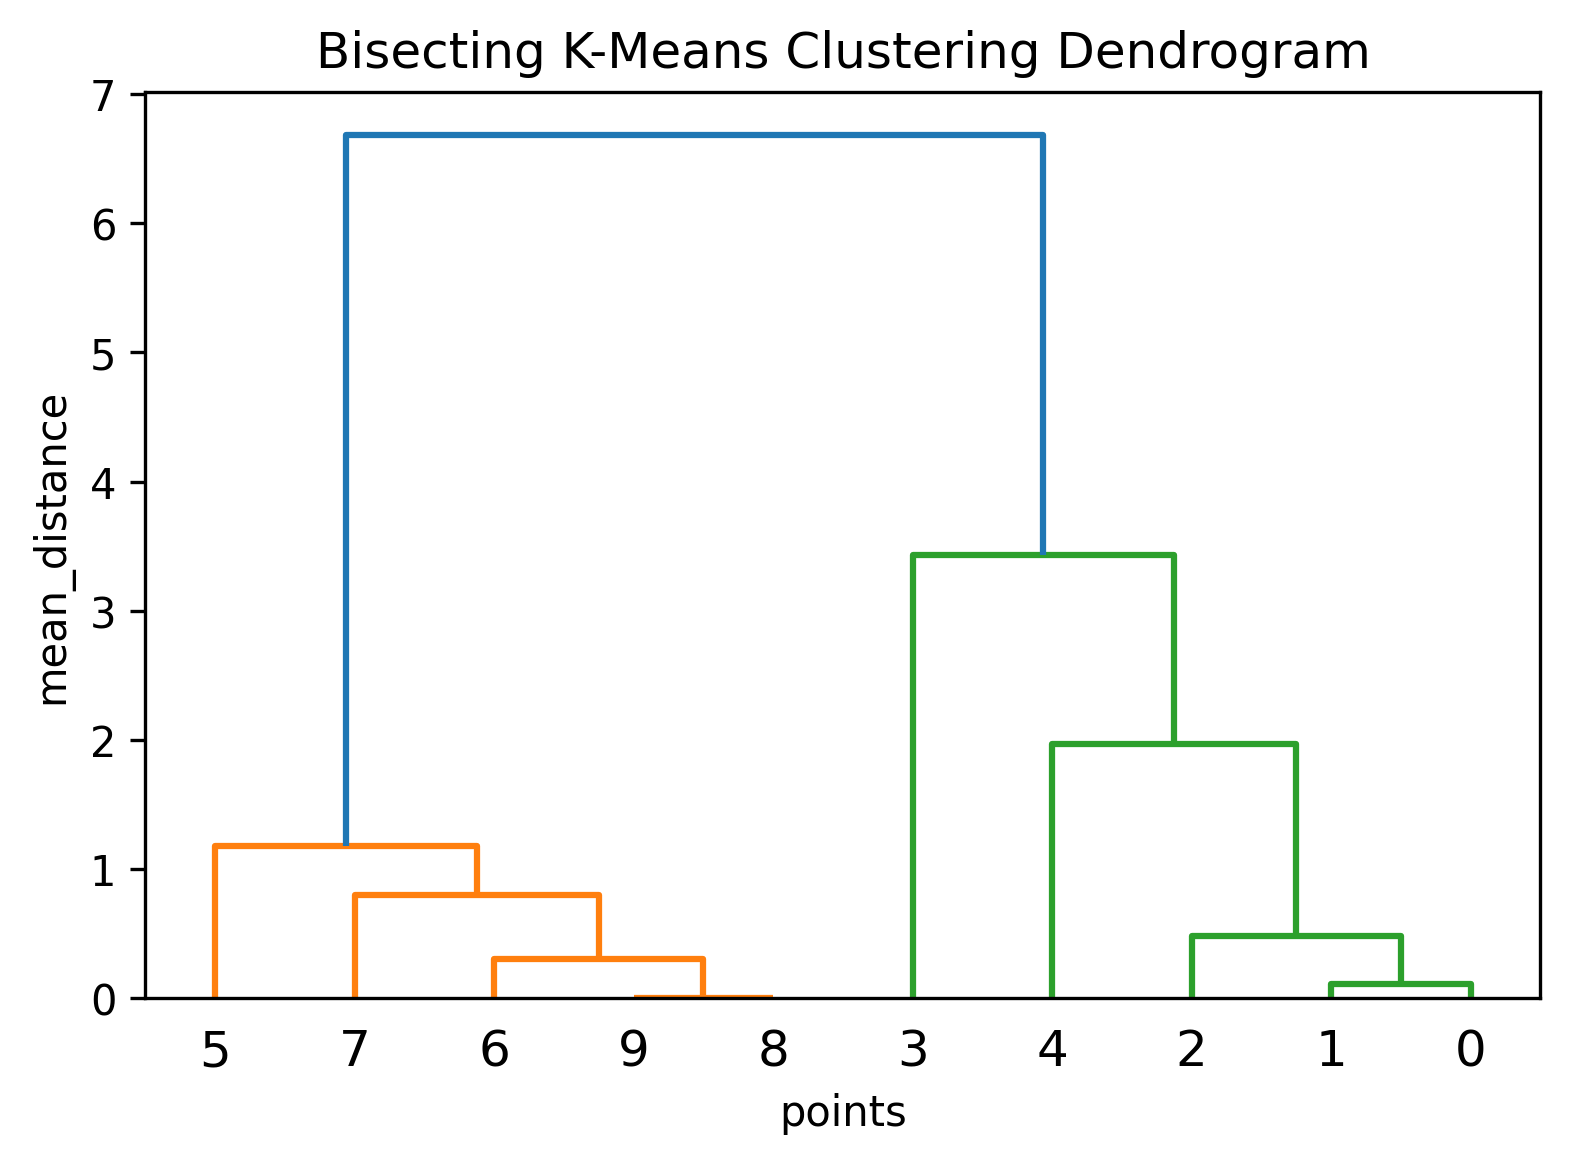

In [10]:
plt.figure()
plt.title('Bisecting K-Means Clustering Dendrogram')
plt.xlabel('points')
plt.ylabel('mean_distance')
dendrogram(bi_kmeans.dendrogram_matrix)
plt.show()

### Step by Step Results

Looping through all number of clusters and visualizing every step of the divisive clustering.

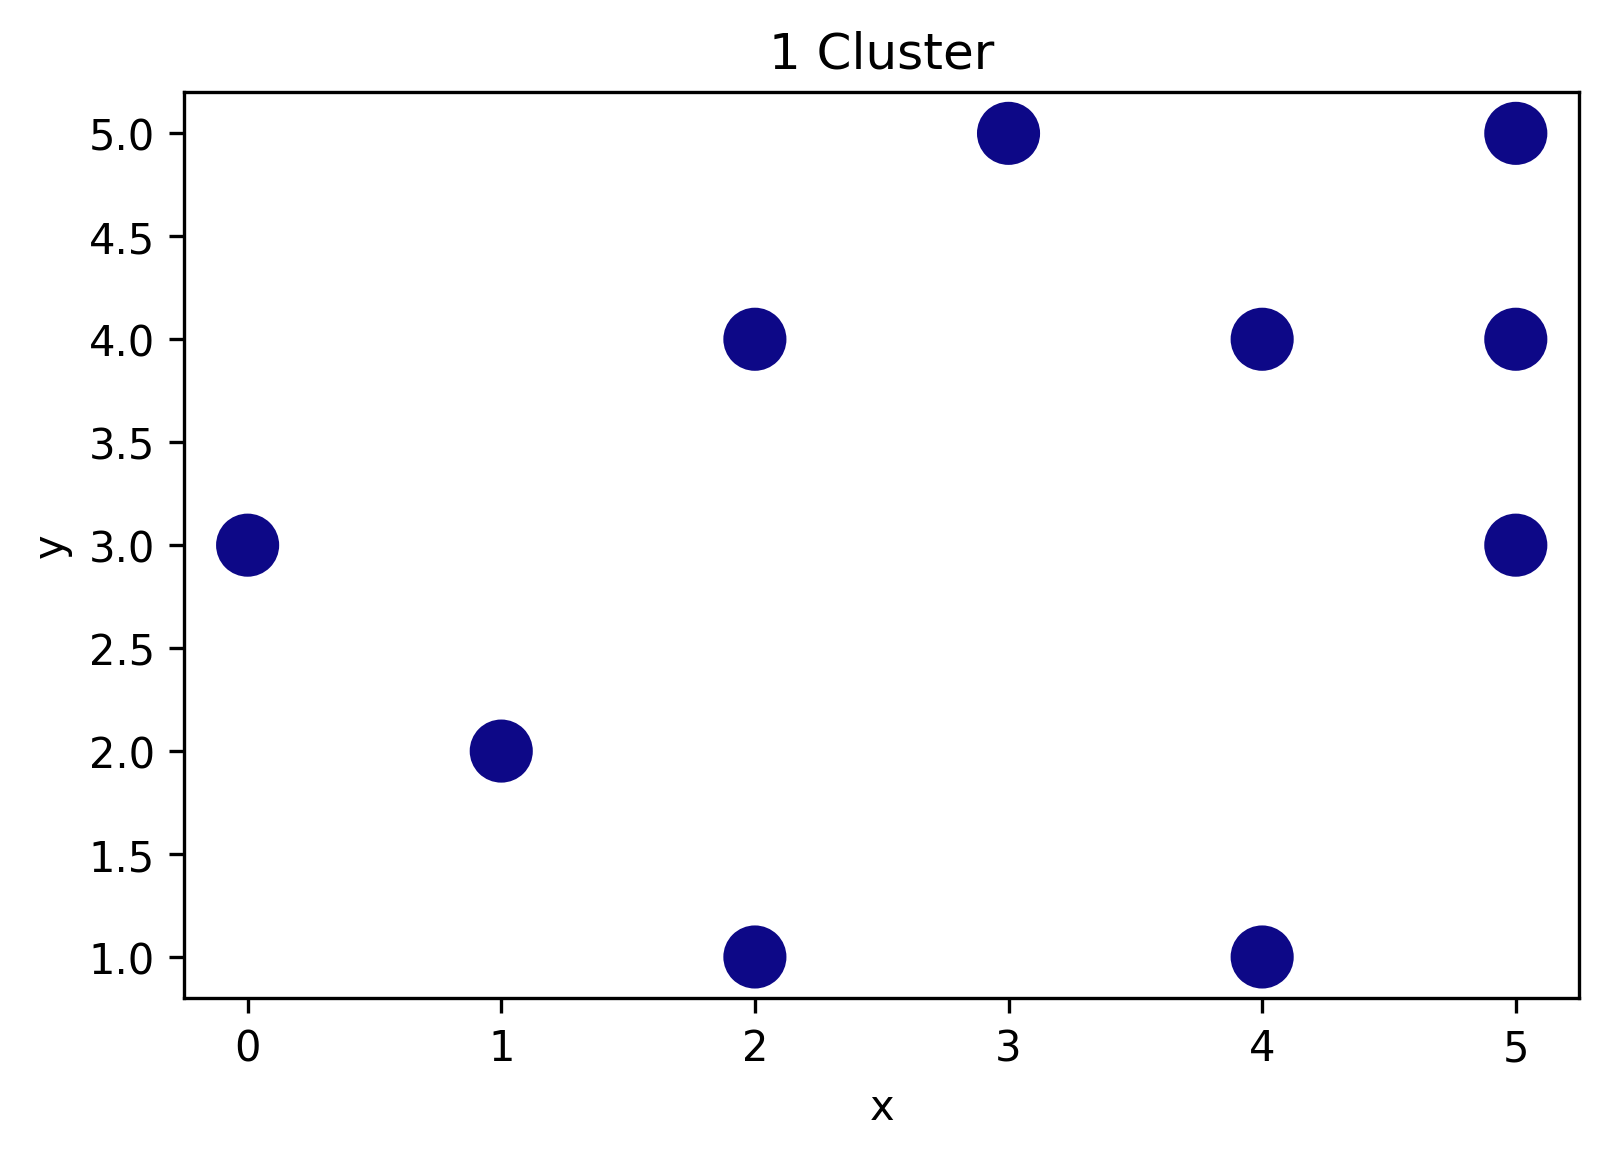

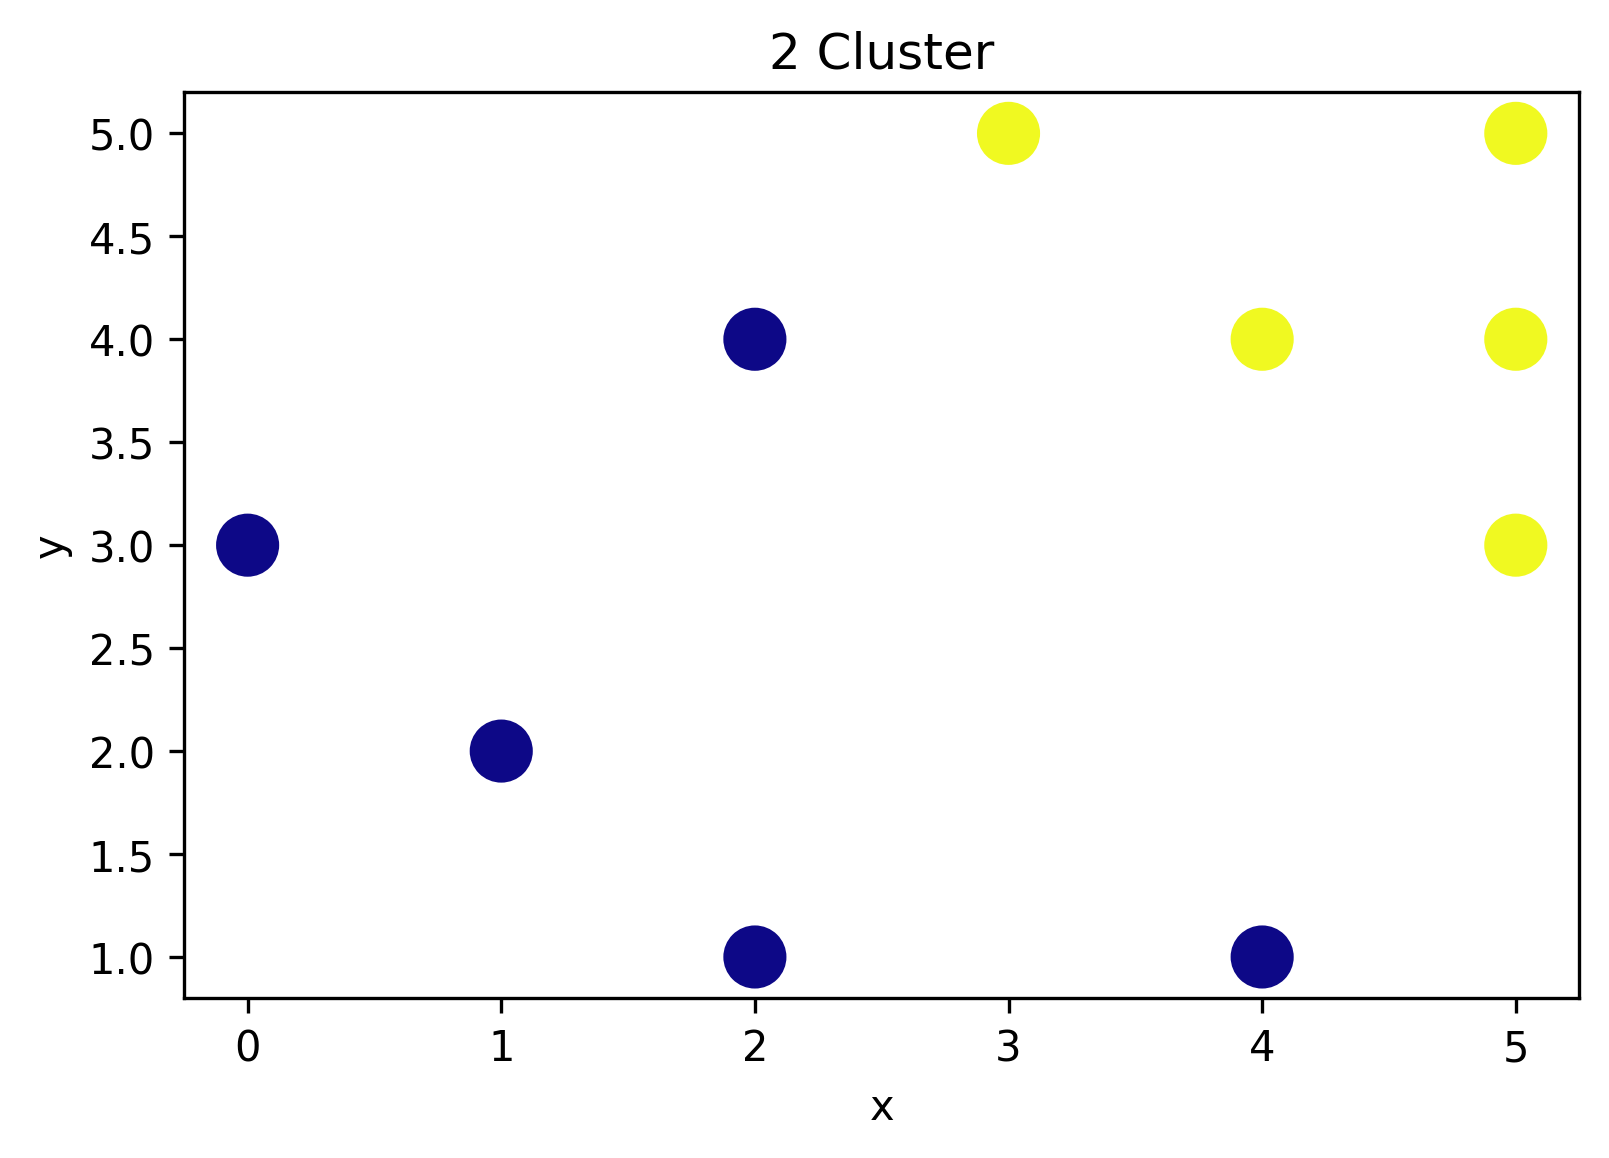

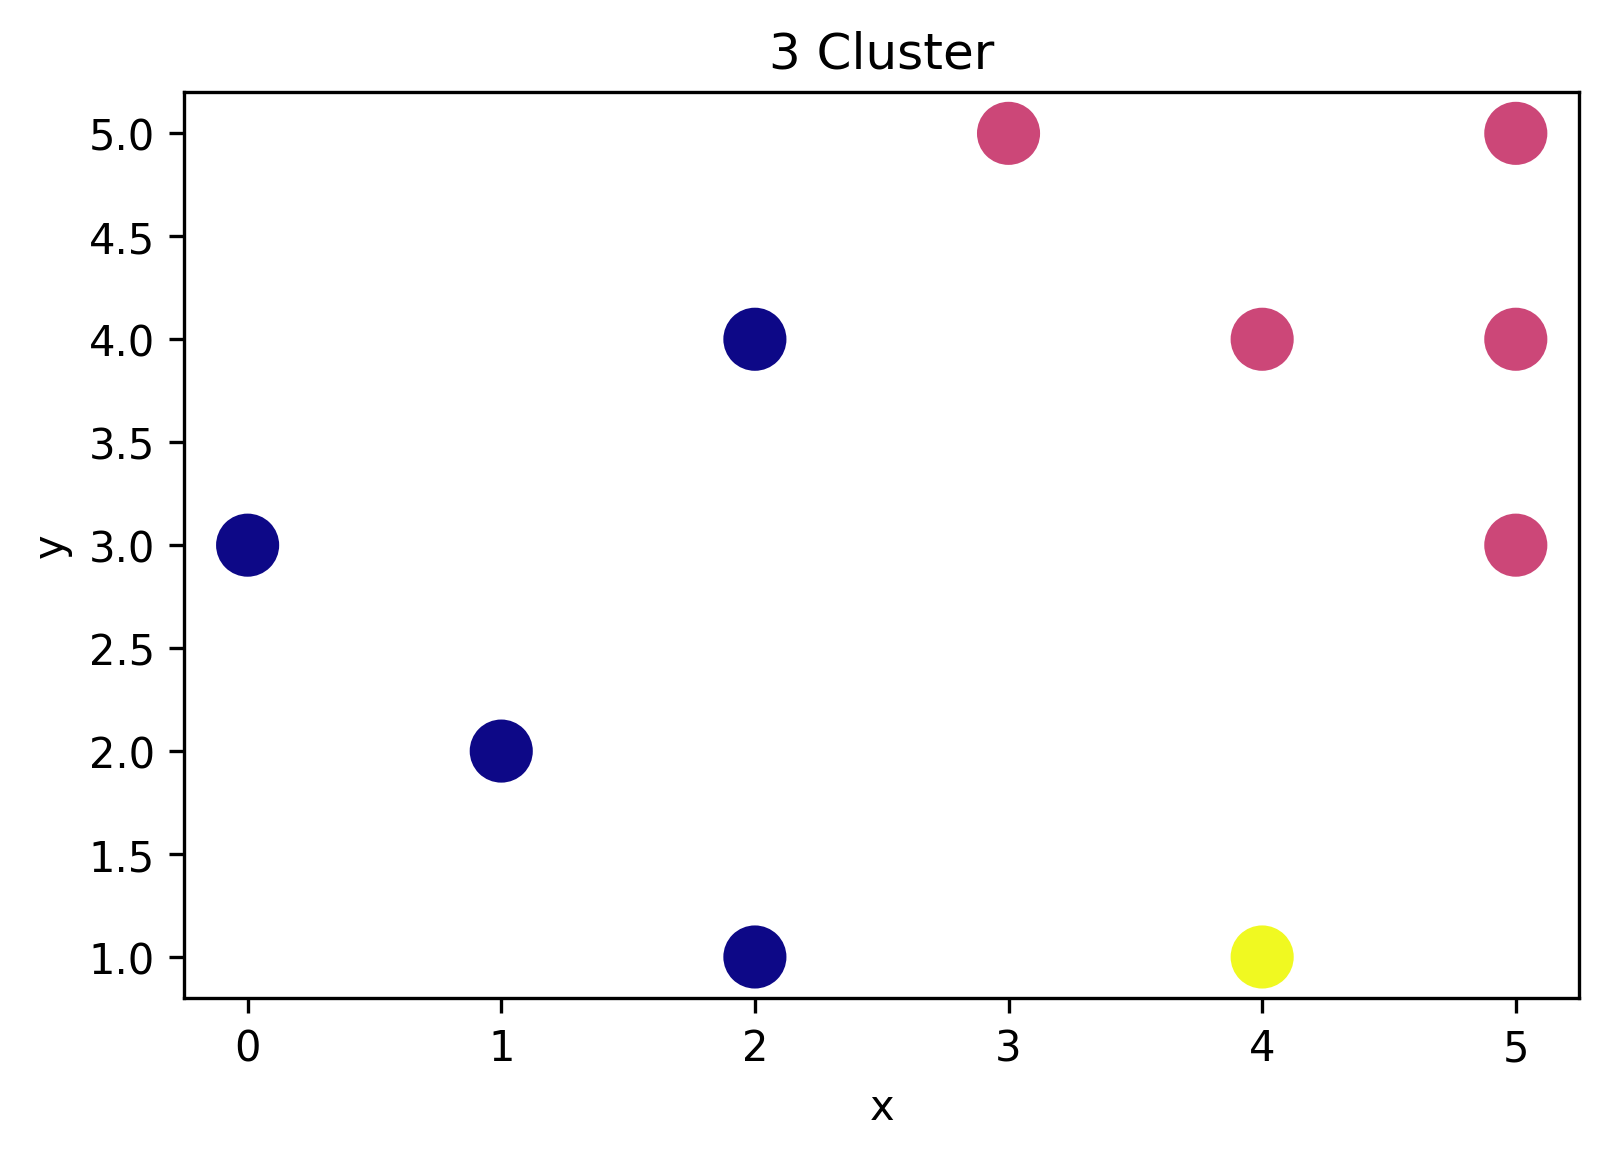

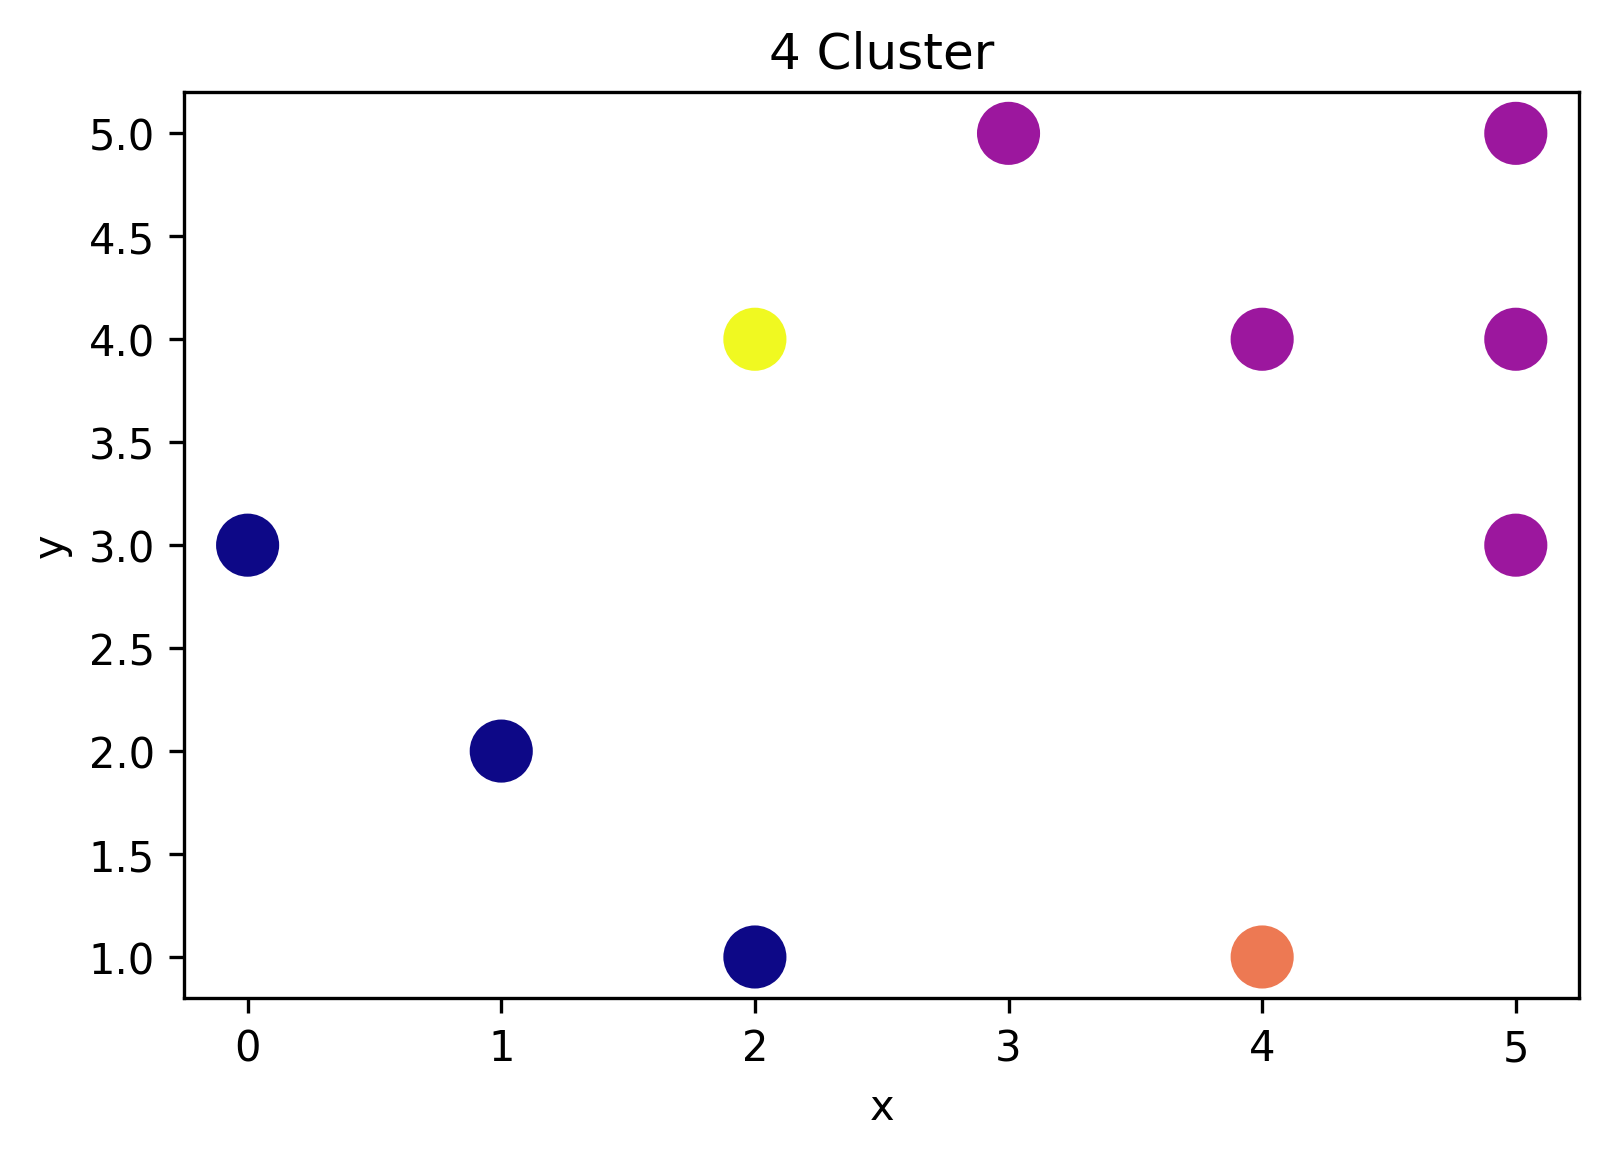

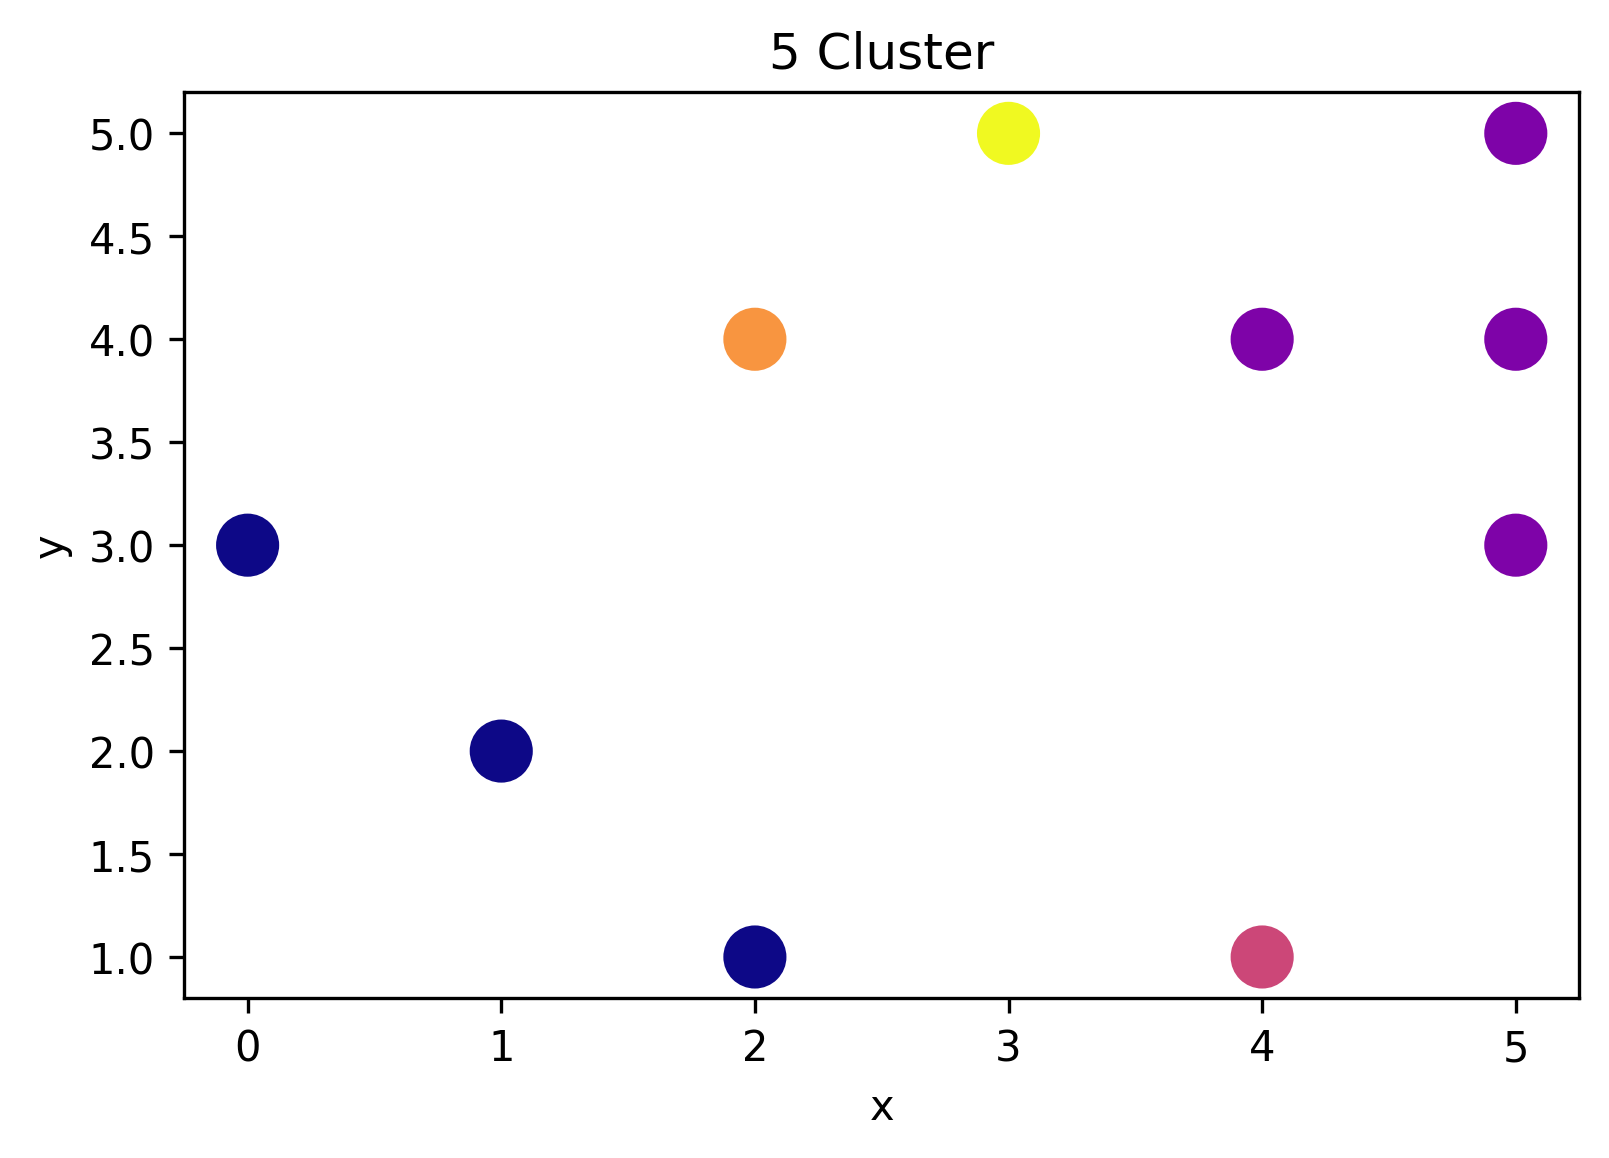

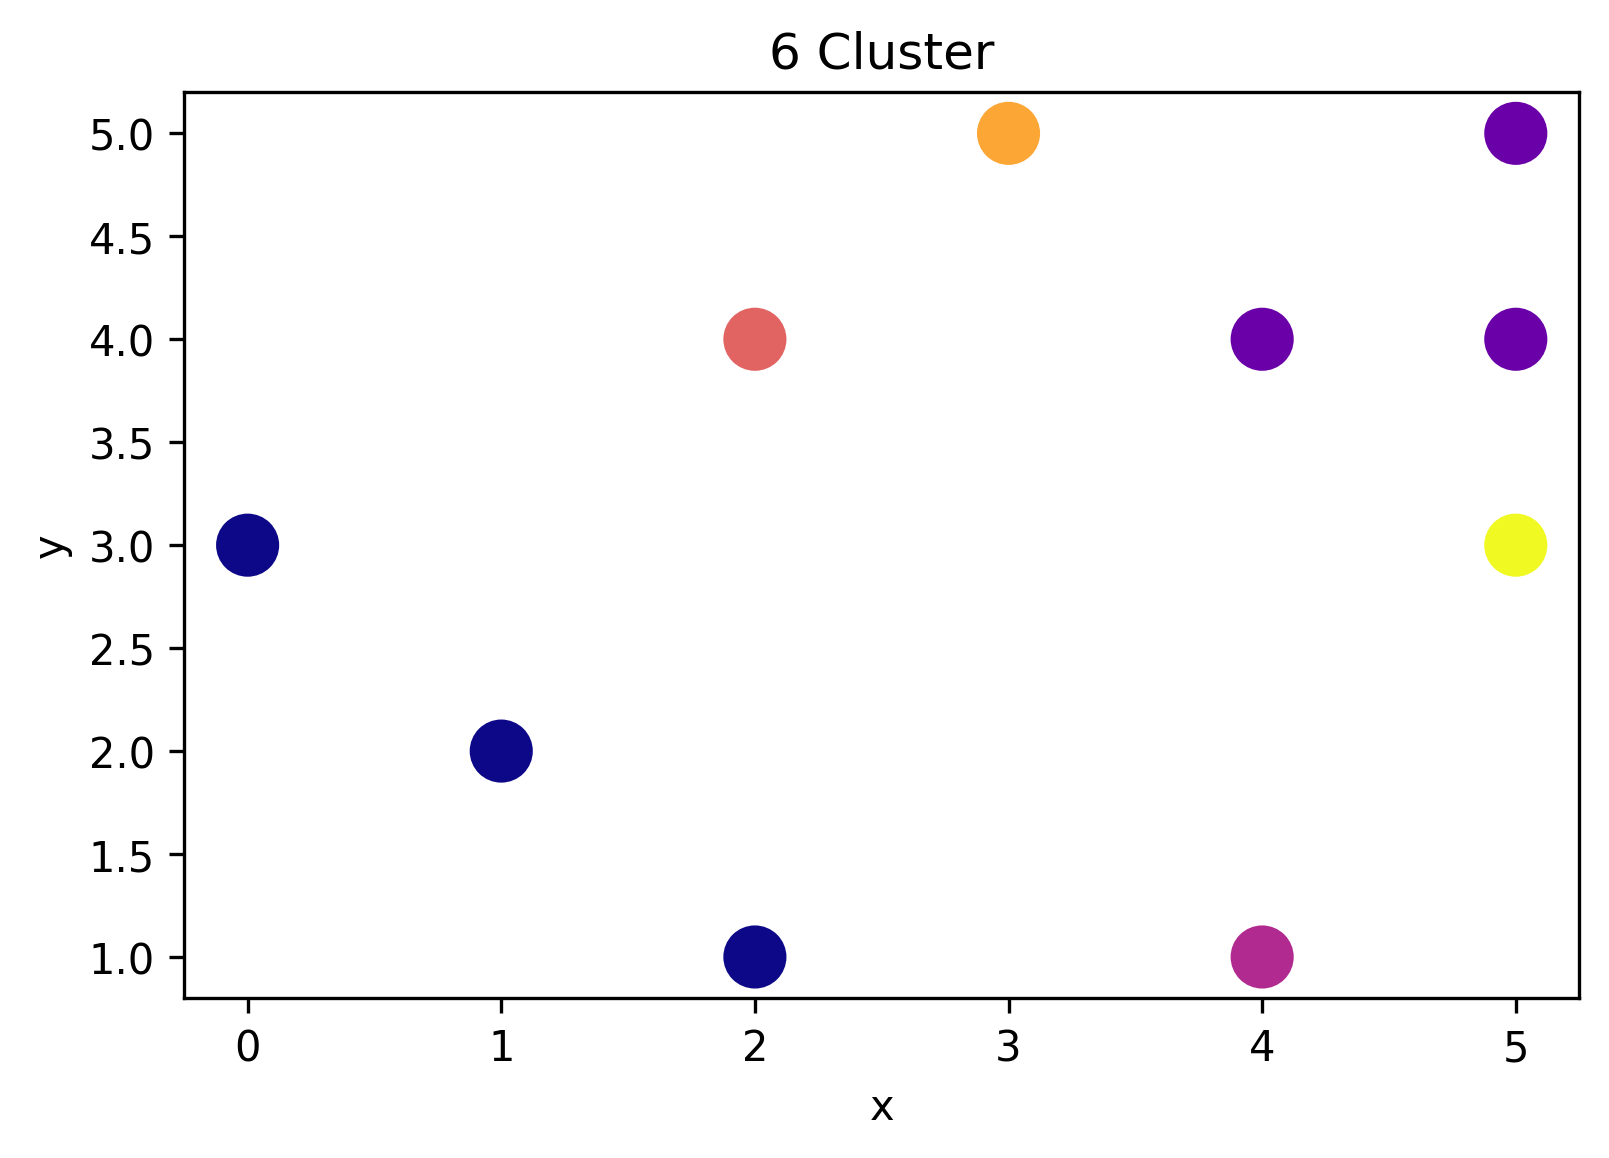

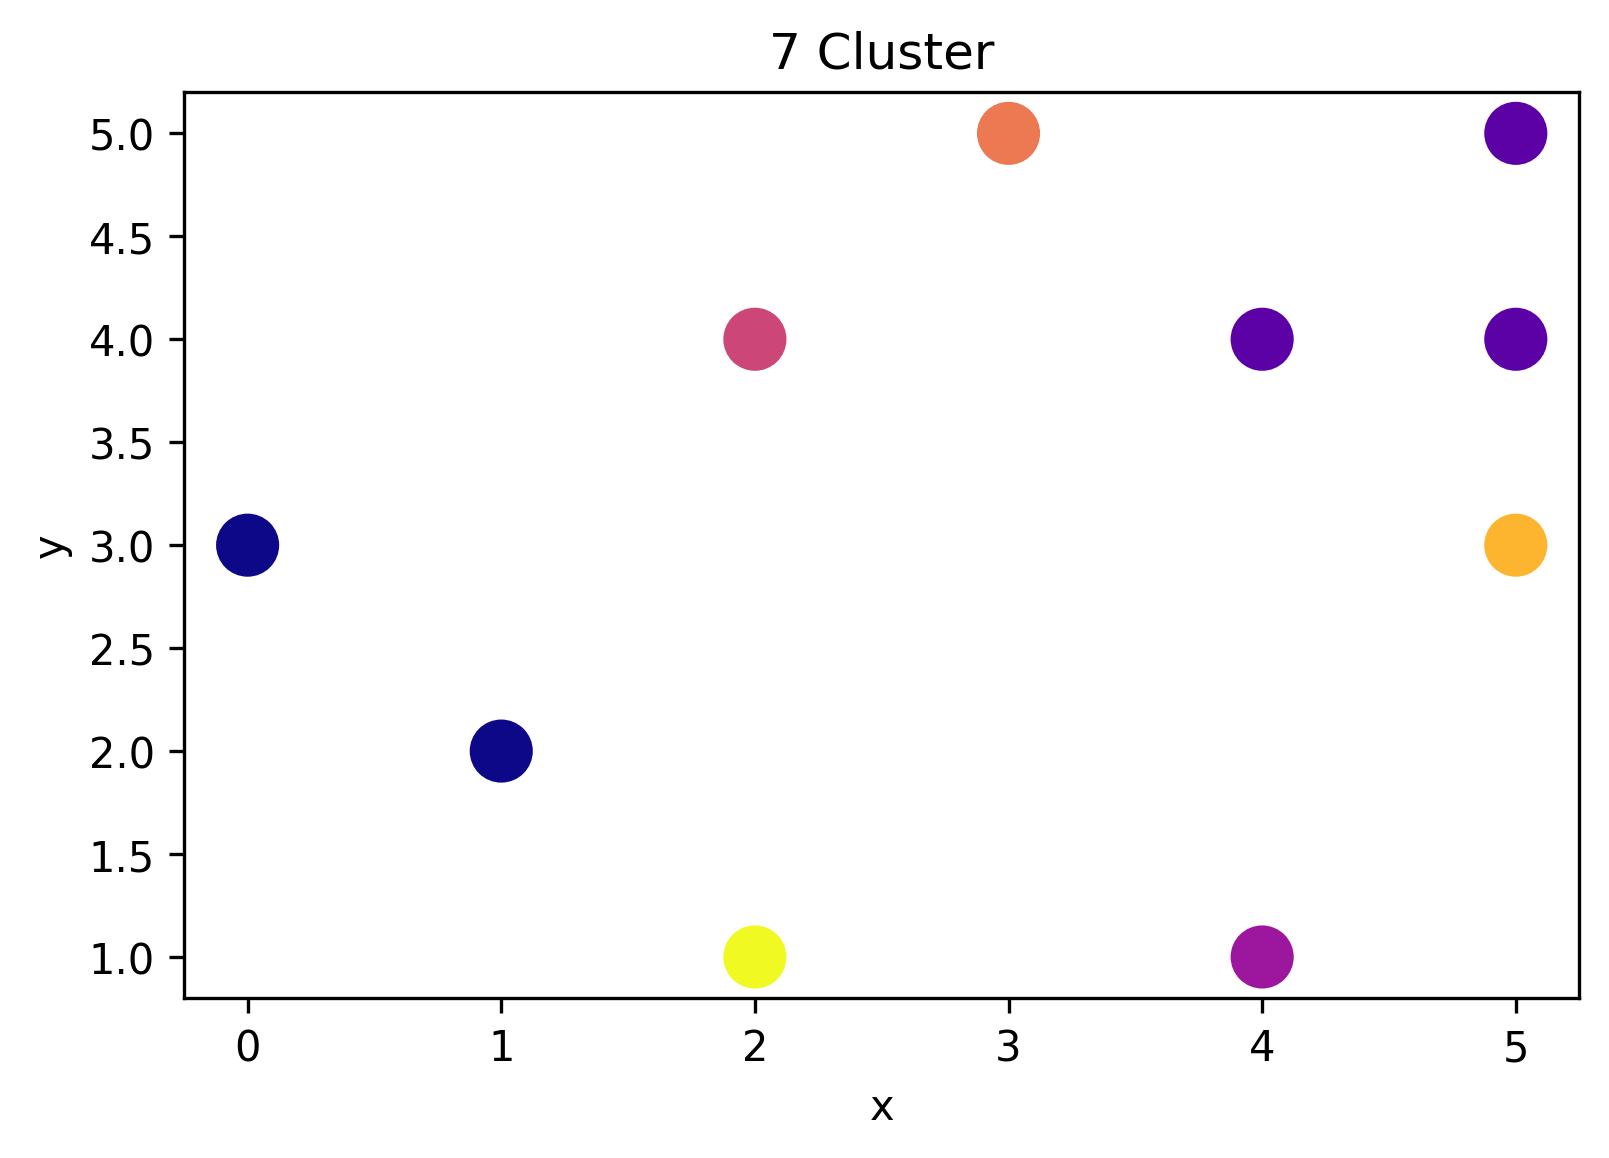

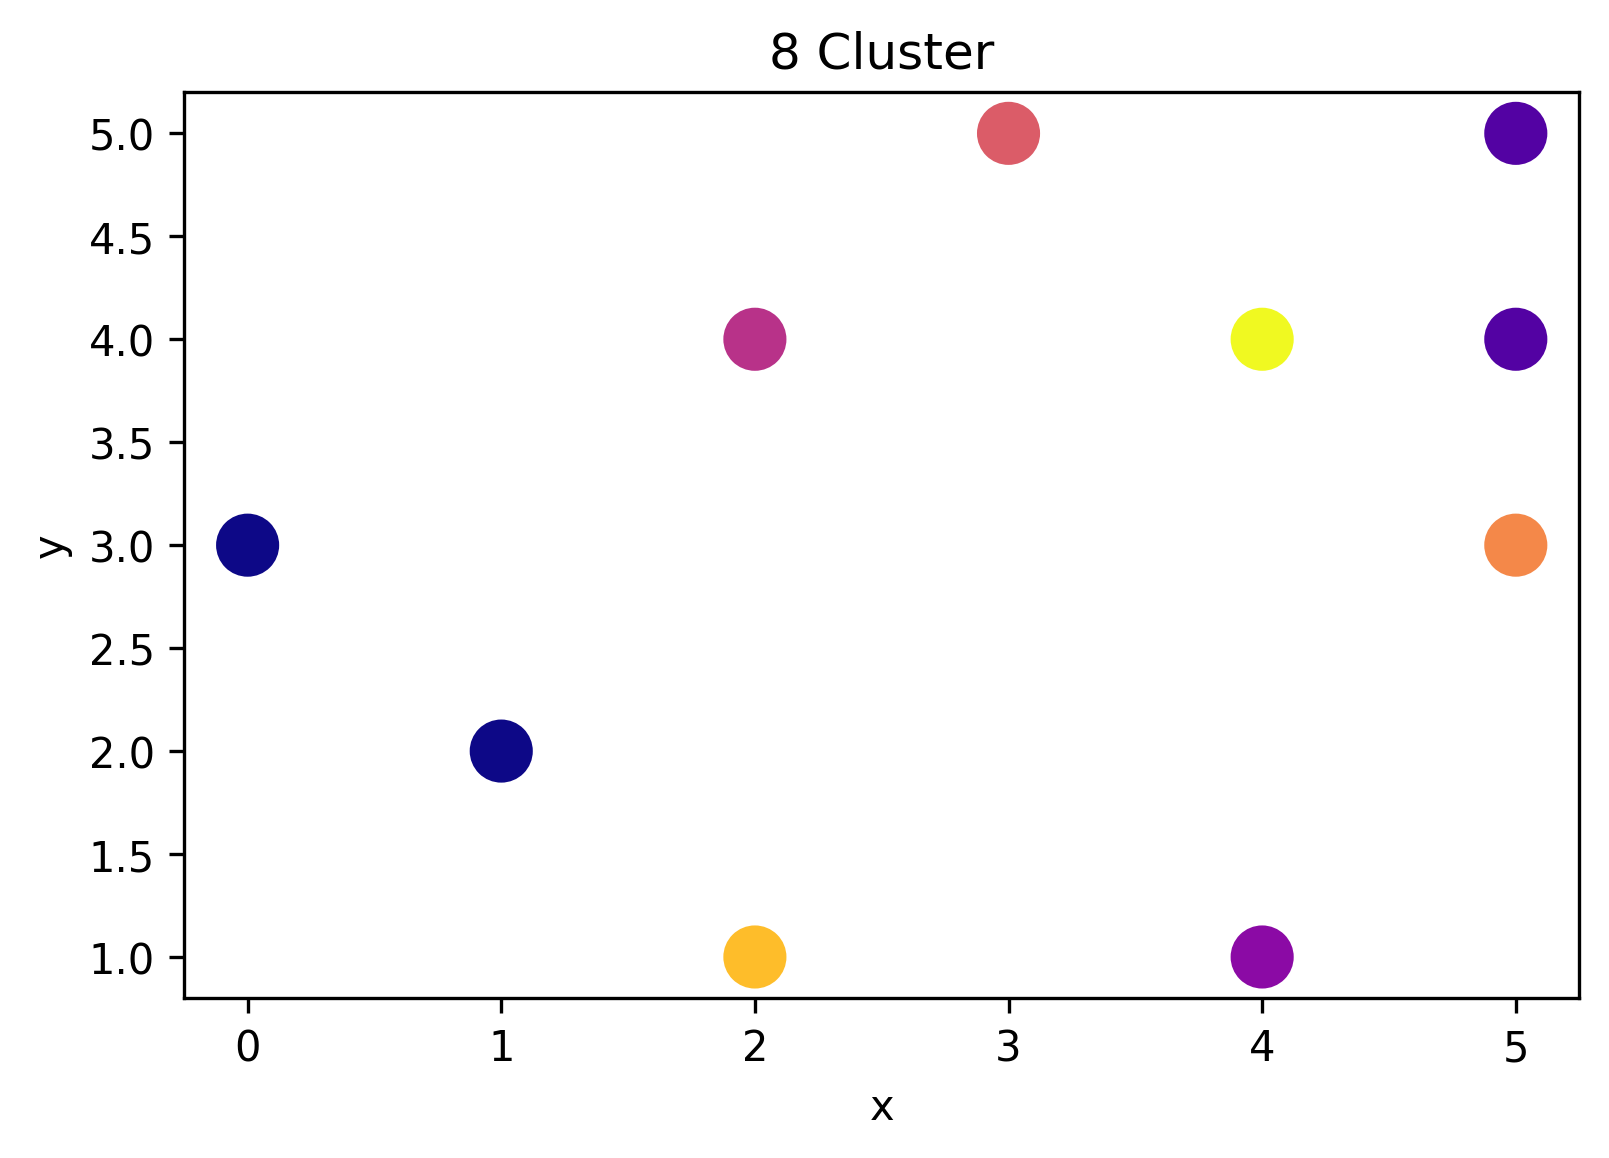

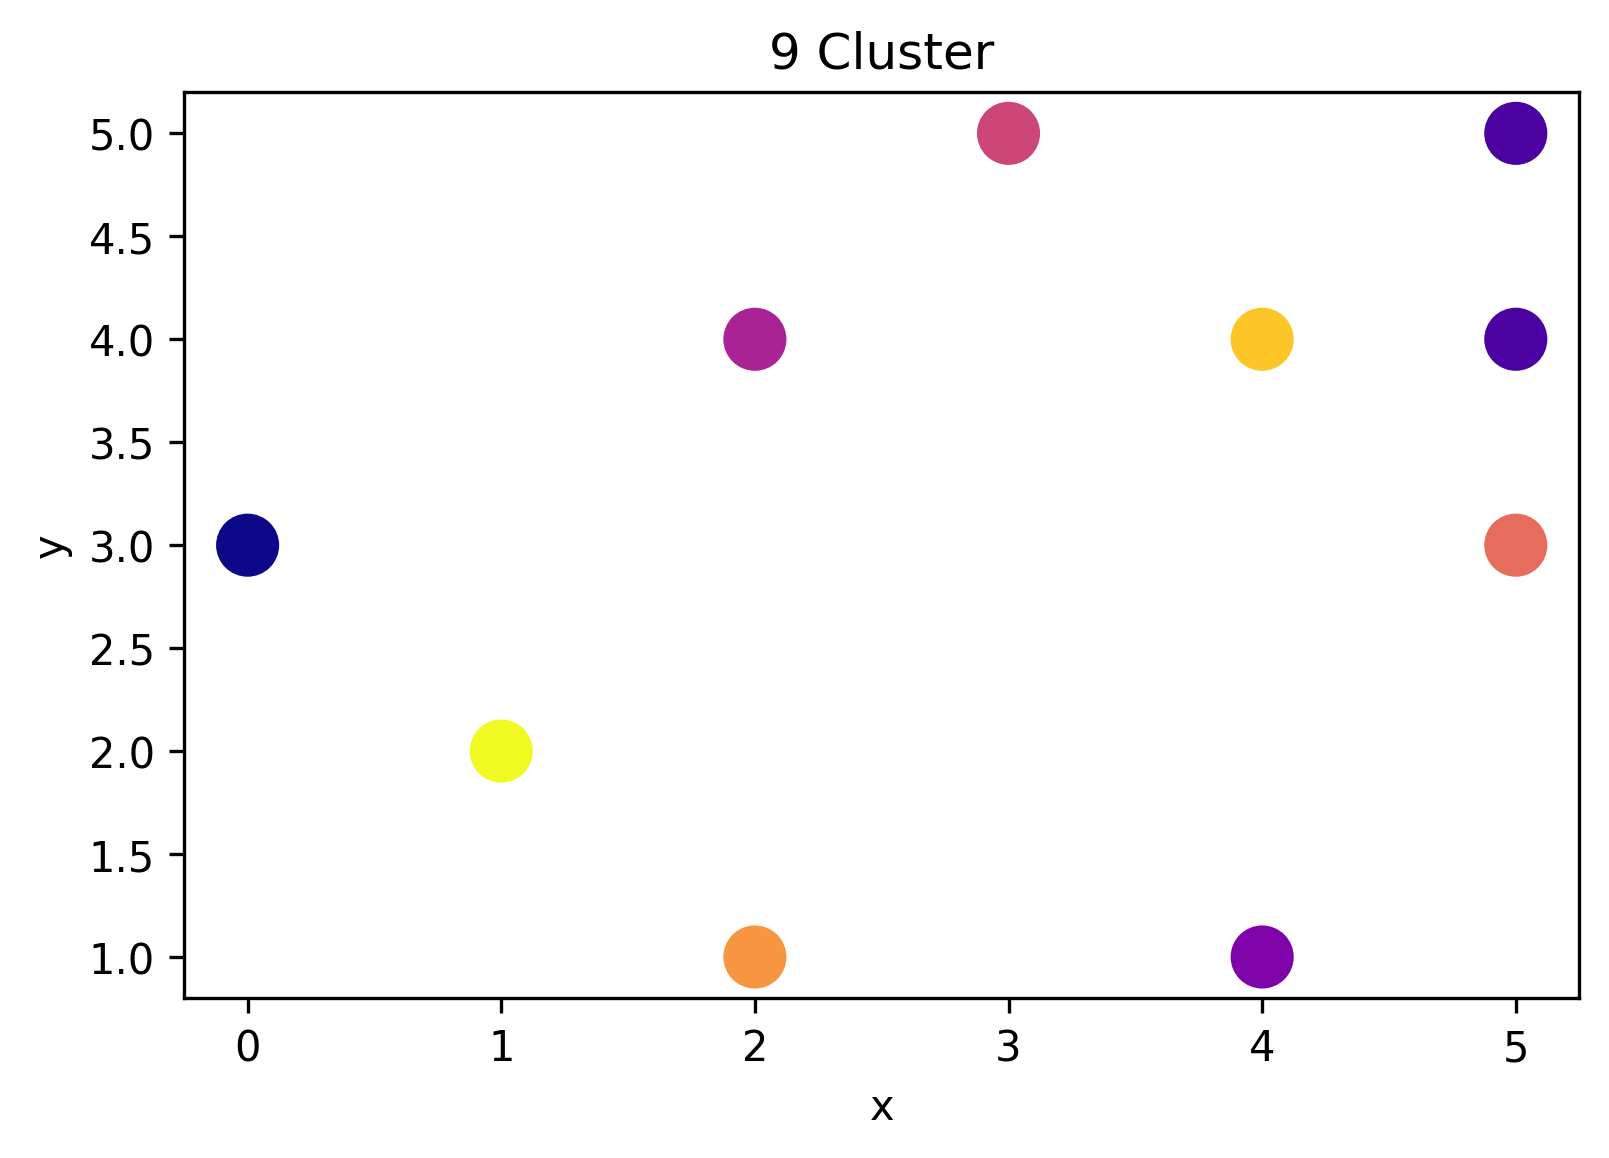

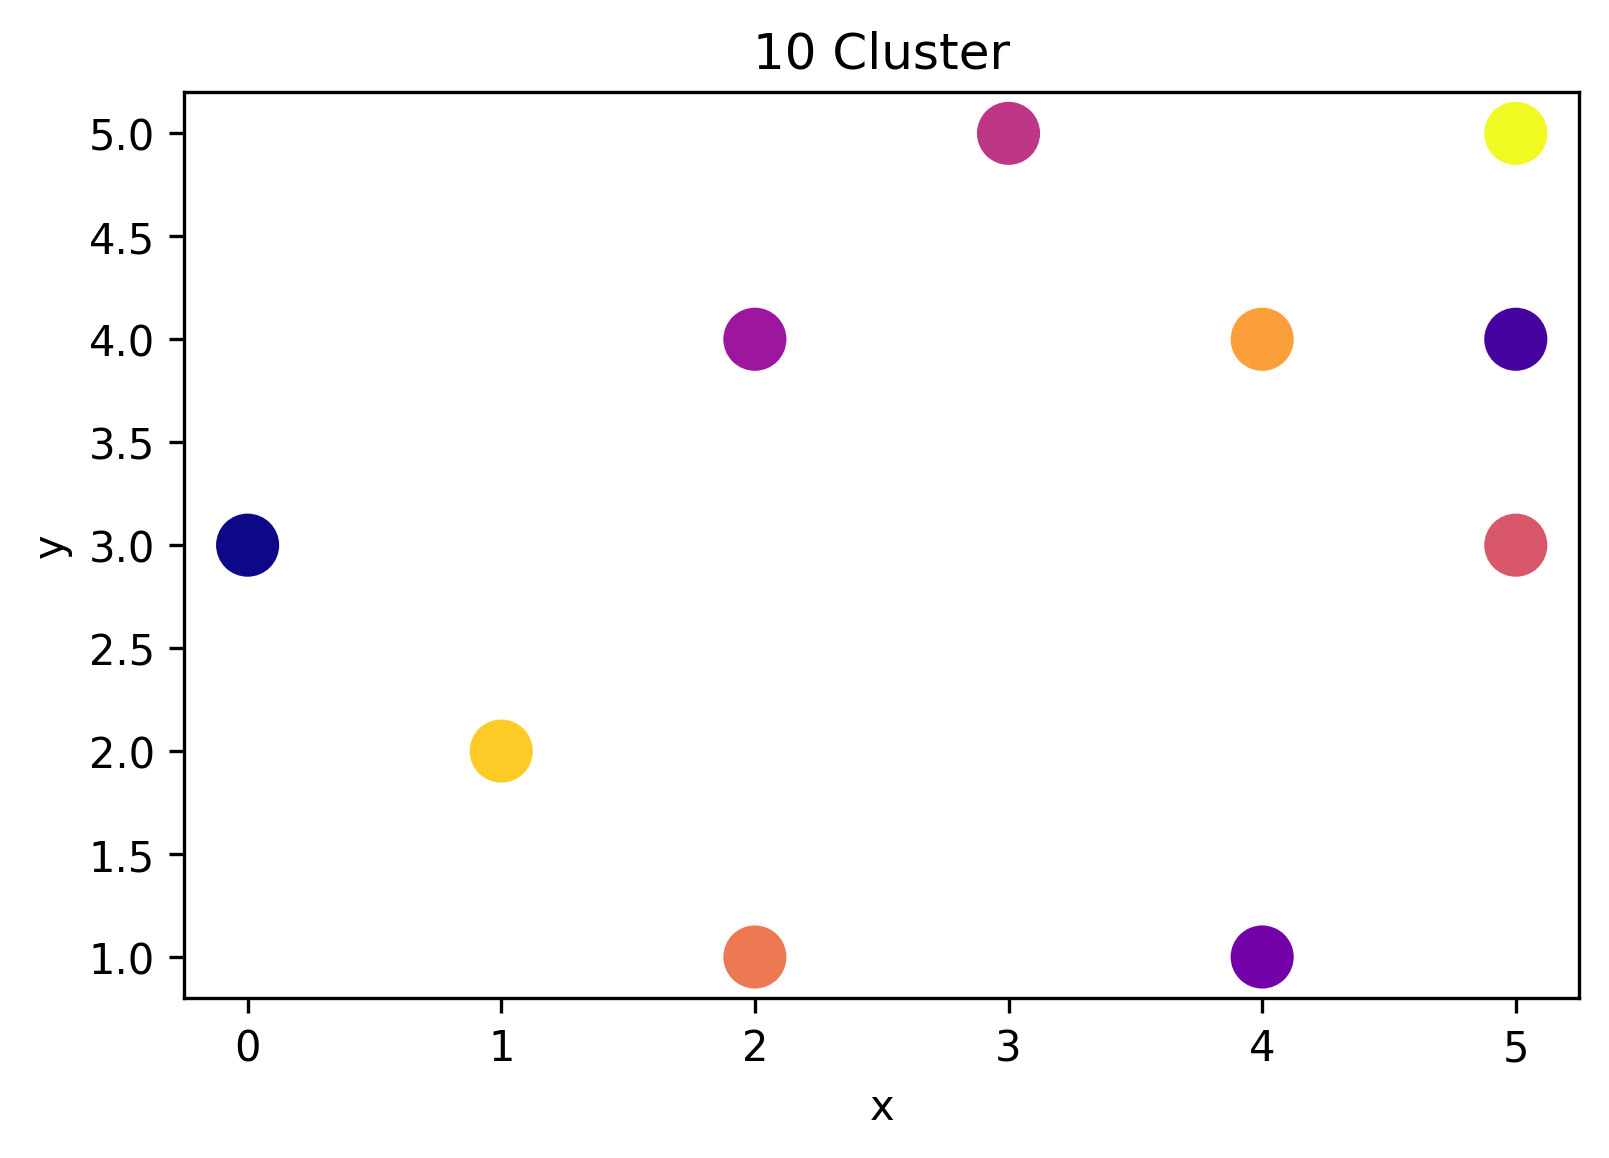

In [11]:
df = pd.DataFrame(dataset)
for i in range(1, len(dataset) + 1):
    df.plot.scatter(
        title=f"{i} Cluster",
        x="x", y="y", c=bi_kmeans.labels_flat(i),
        colormap='plasma', s=200
    )